# Vatnsendi distributed heating network

Lets load the network and plot the topology

In [289]:

import numpy as np
import matplotlib.pyplot as plt
from epyt import epanet
import time

In [290]:


# Load the EPANET model
# inp_file = "C:\\Users\\frodi\\Documents\\OptimisedHeating\\Epanet\\currently_working\\Vatnsendi_rjupnasalir_pattern.inp"
# inp_file = "C:\\Users\\frodi\\Documents\\OptimisedHeating\\Epanet\\currently_working\\Vatnsendi_pattern_efra.inp"
inp_file = r"C:\Users\frodi\Desktop\OptimisedHeating\Epanet\currently_working\Vatnsendi_pattern_efra.inp"
# inp_file = "C:\\Users\\frodi\\Documents\\OptimisedHeating\\Epanet\\currently_working\\Vatnsendi_pattern_nedra.inp"

d = epanet(inp_file)


EPANET version 20200 loaded (EPyT version v1.2.1 - Last Update: 09/01/2024).
Input File Vatnsendi_pattern_efra.inp loaded successfully.



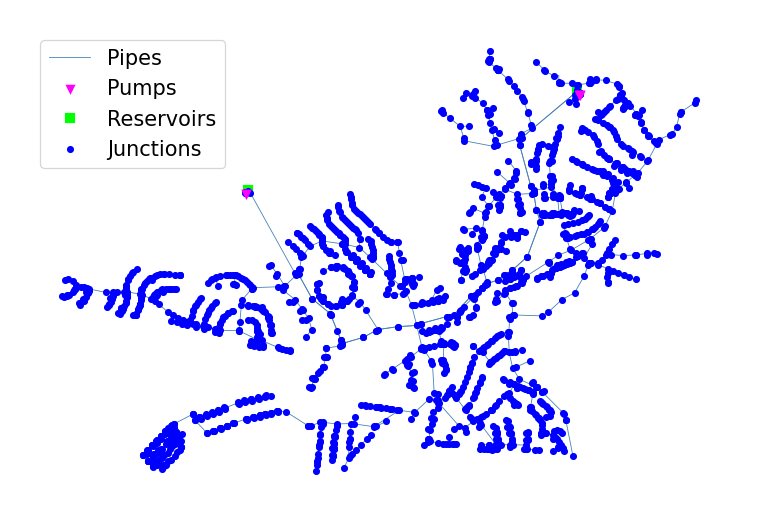

In [291]:
# Plot network topology
d.plot()
plt.show(block=True)  # Ensures only one plot is shown

In [292]:
# Run hydraulic analysis of a network
# Hydraulic analysis using binary file
# (This function ignore events)
hyd_res = d.getComputedHydraulicTimeSeries()
print(f" Attributes calculated in  hydraulic analysis:  {list(hyd_res.to_dict().keys())}")
# Change time-stamps from seconds to hours
hrs_time = hyd_res.Time/3600

 Attributes calculated in  hydraulic analysis:  ['Time', 'Pressure', 'Demand', 'DemandDeficit', 'Head', 'TankVolume', 'Flow', 'Velocity', 'HeadLoss', 'Status', 'StatusStr', 'Setting', 'Energy', 'Efficiency', 'State', 'StateStr']


In [293]:
def get_node_indices(d, node_names_input):
    # Get the list of node names
    node_names = d.getNodeNameID()
    
    # Create a dictionary to map node names to indices using the list's index method
    node_name_to_index = {name: index for index, name in enumerate(node_names)}
    
    # Return a list of indices corresponding to the input node names
    node_indices = [node_name_to_index.get(name, None)+1 for name in node_names_input]
    
    return node_indices
# node_input_names = ['100','101','102']
# node_indices = get_node_indices(d,node_input_names)


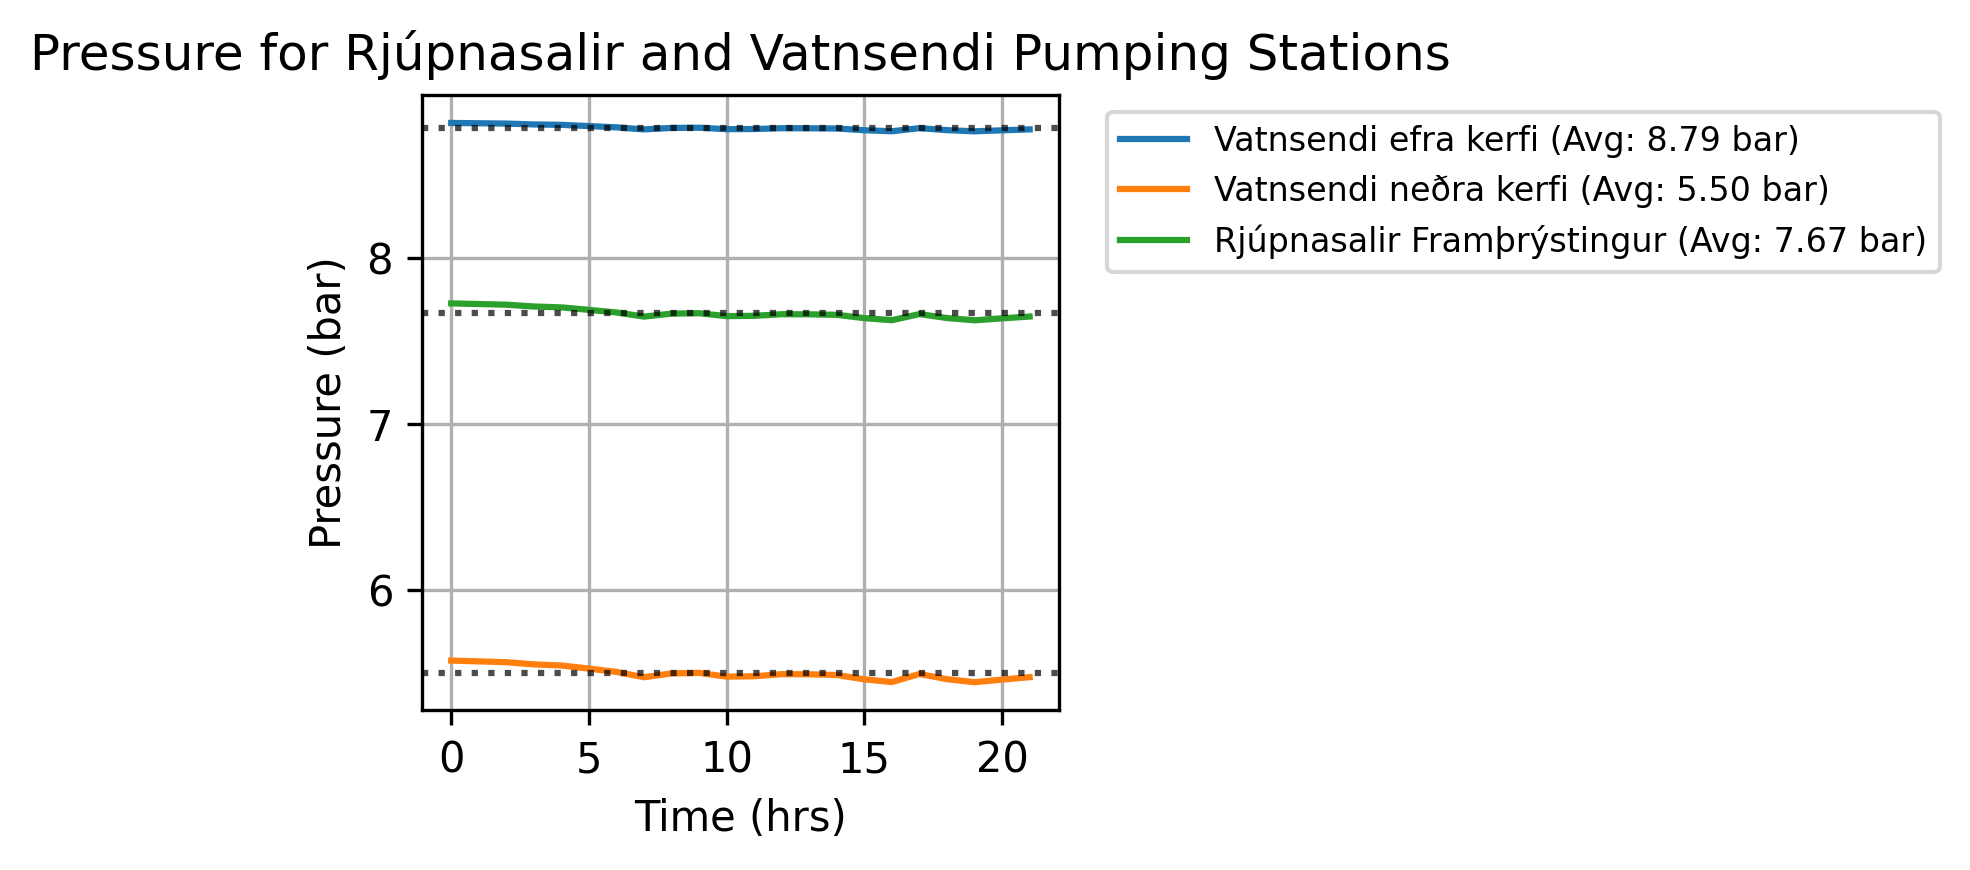

In [294]:


node_input_names = ['100', '101', '102']
node_indices = get_node_indices(d, node_input_names)

# Conversion factor from meters of water to bar
meters_to_bar = 0.0980665  # 1 meter of water = 0.0980665 bar

# Define custom legend names (in the same order as node_input_names)
custom_legend_names = ['Vatnsendi efra kerfi', 'Vatnsendi neðra kerfi', 'Rjúpnasalir Framþrýstingur']

# Create a figure
plt.figure(figsize=(6, 3))

# List to store legend entries
legend_entries = []

# Loop through each node index and plot the corresponding pressure
for i, index in enumerate(node_indices):
    # Convert pressure from meters to bar
    pressure_in_bar = hyd_res.Pressure[:, index - 1] * meters_to_bar
    
    # Compute the average pressure
    avg_pressure = np.mean(pressure_in_bar)
    
    # Plot the pressure curve
    plt.plot(hrs_time, pressure_in_bar, label=f"{custom_legend_names[i]} (Avg: {avg_pressure:.2f} bar)")
    
    # Plot the average pressure as a dotted line
    plt.axhline(y=avg_pressure, linestyle='dotted', color='black', alpha=0.7)

# Customize the plot
plt.title('Pressure for Rjúpnasalir and Vatnsendi Pumping Stations')
plt.xlabel('Time (hrs)')
plt.ylabel('Pressure (bar)')

# Add a grid for better visualization
plt.grid(True)

# Move the legend outside the plot (to the right)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to prevent clipping of legend
plt.tight_layout()

# Show the plot
plt.show()


In [295]:
def get_link_indices(d, link_names_input):
    # Get the list of link names
    link_names = d.getLinkNameID()
    
    # Create a dictionary to map link names to indices using the list's index method
    link_name_to_index = {name: index for index, name in enumerate(link_names)}
    
    # Return a list of indices corresponding to the input link names (adding 1 for correct index)
    link_indices = [link_name_to_index.get(name, None) +1 for name in link_names_input]
    
    return link_indices


# print(d.getLinkNameID())


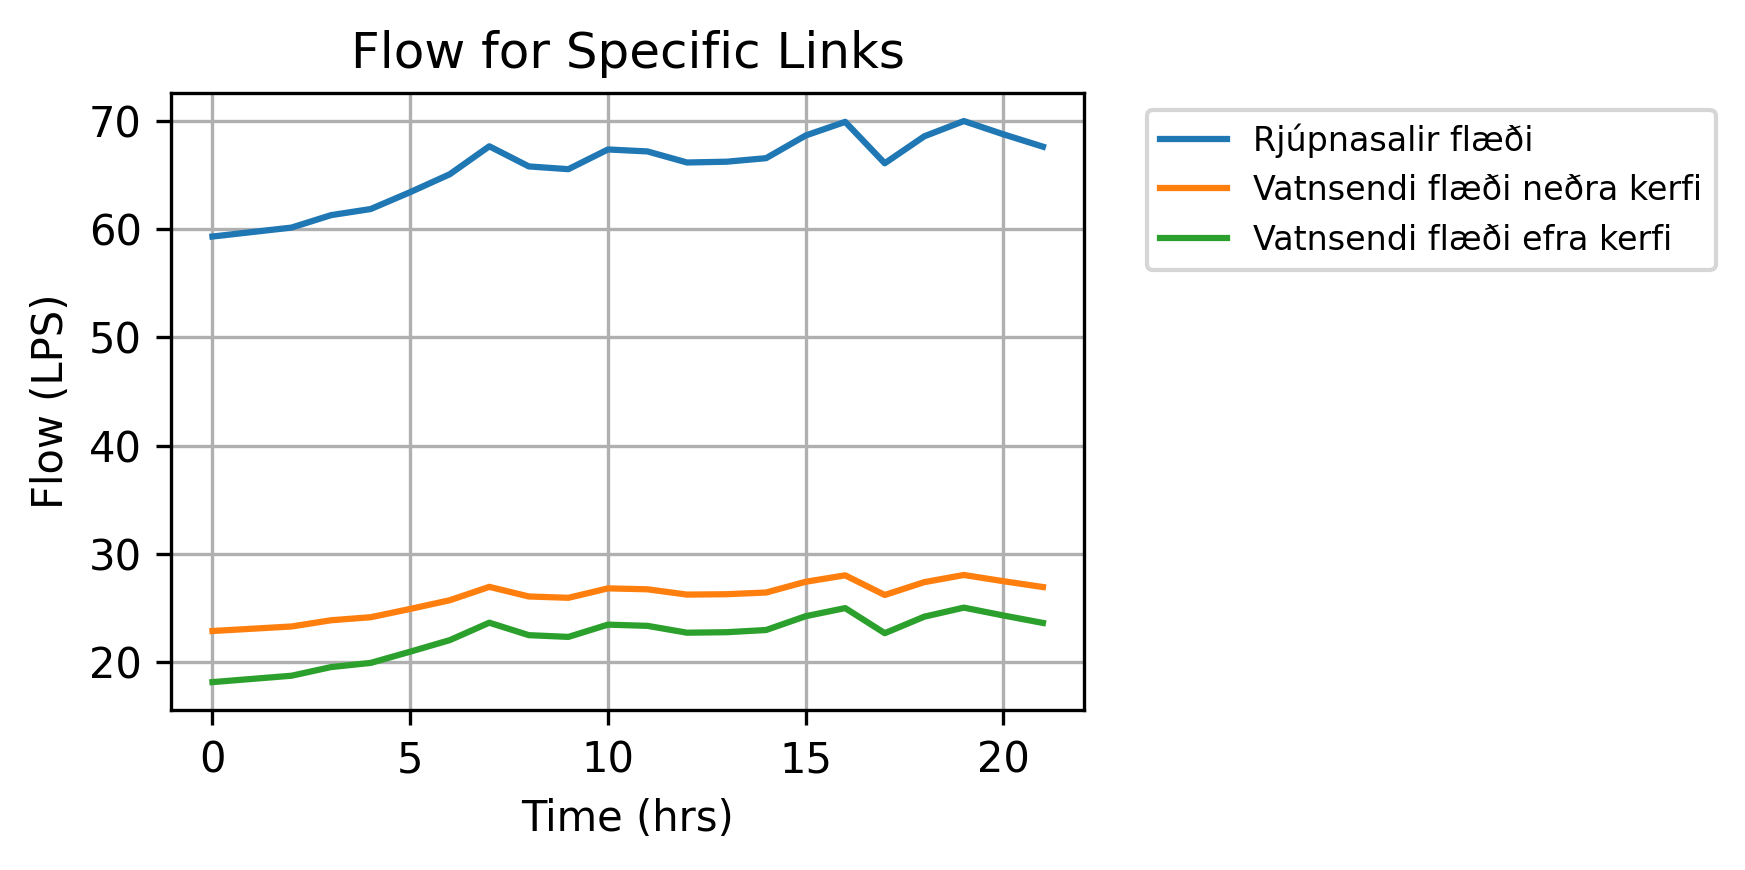

In [296]:
link_input_names = ['11','19','Pipe-62614']
link_indices = get_link_indices(d,link_input_names)

custom_legend_names = ['Rjúpnasalir flæði', 'Vatnsendi flæði neðra kerfi', 'Vatnsendi flæði efra kerfi']

# Create a figure
plt.figure(figsize=(6, 3))

# Loop through each link index and plot the corresponding absolute flow
for i,index in enumerate(link_indices):
    # Extract the flow for the link and take the absolute value
    flow = np.abs(hyd_res.Flow[:, index - 1])  # Take absolute value of flow
    # Plot the absolute flow over time
    plt.plot(hrs_time, flow, label=custom_legend_names[i])

# Customize the plot
plt.title('Flow for Specific Links')
plt.xlabel('Time (hrs)')
plt.ylabel(f'Flow ({d.units.LinkFlowUnits})')  # Units of link flow

# Add a grid for better visualization
plt.grid(True)

# Add a legend with the links, placed outside the plot to avoid cluttering
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to prevent clipping of legend
plt.tight_layout()

# Show the plot
plt.show()


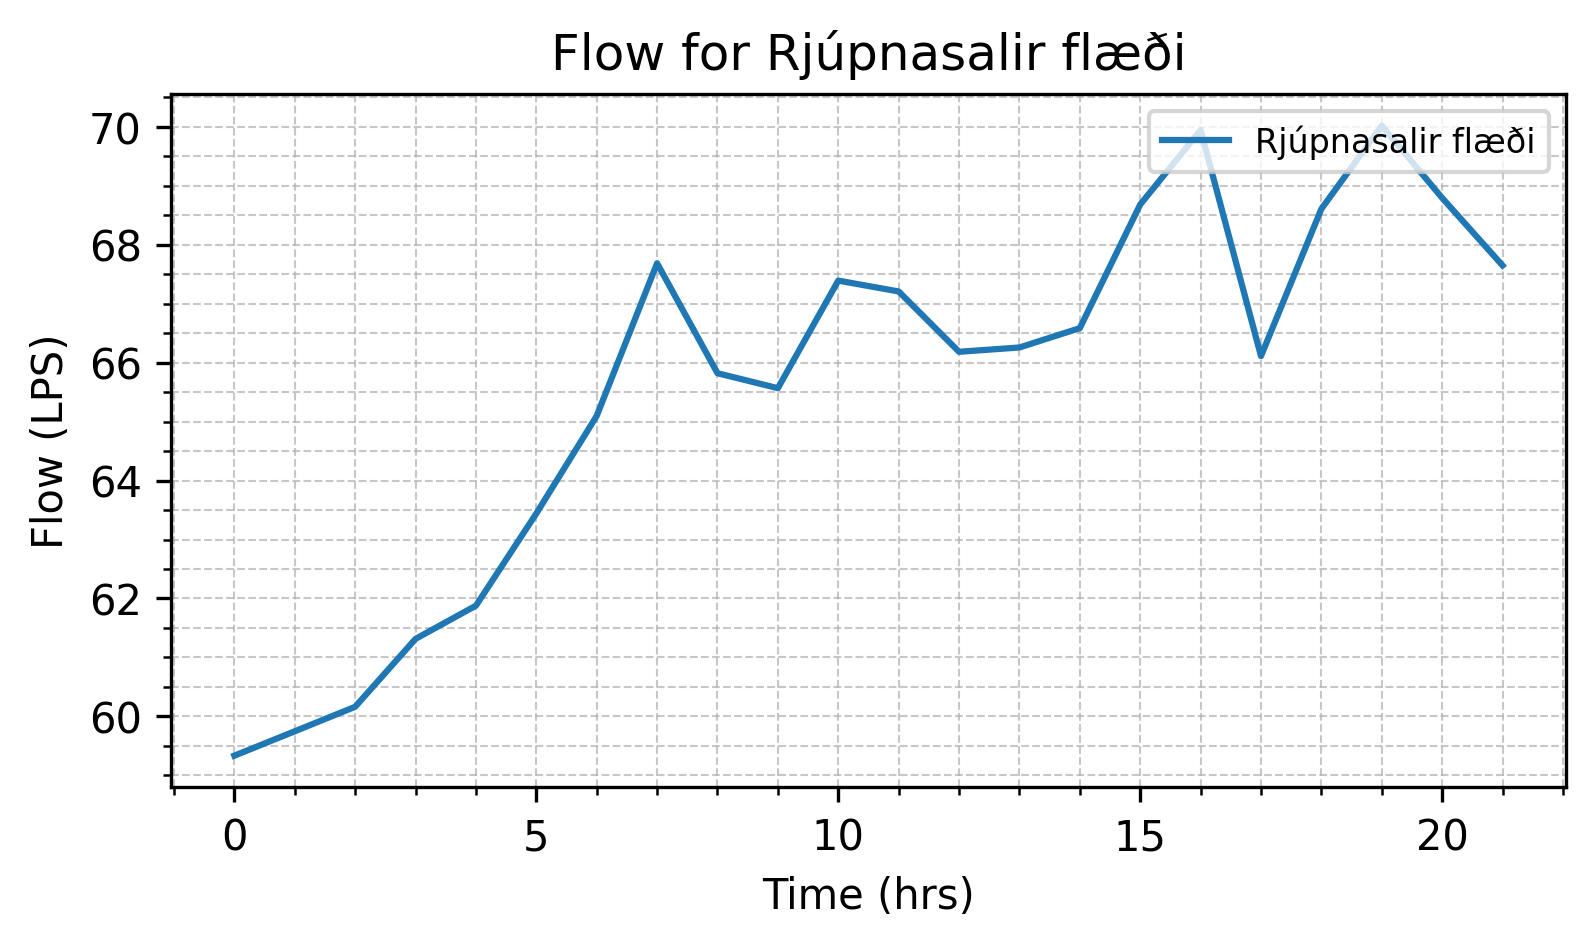

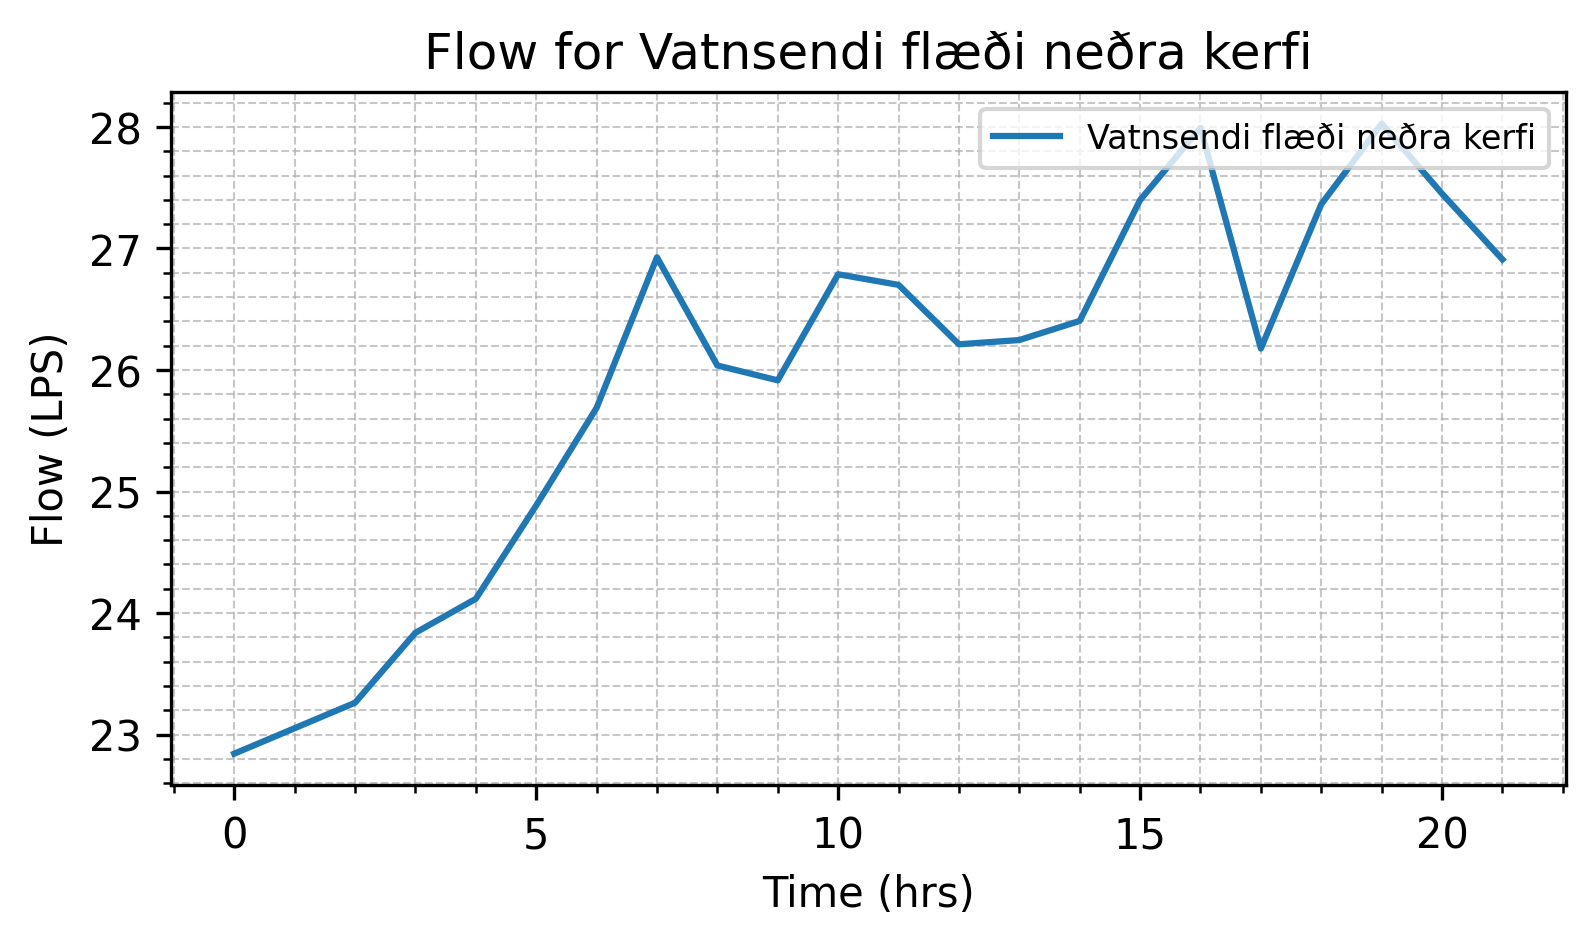

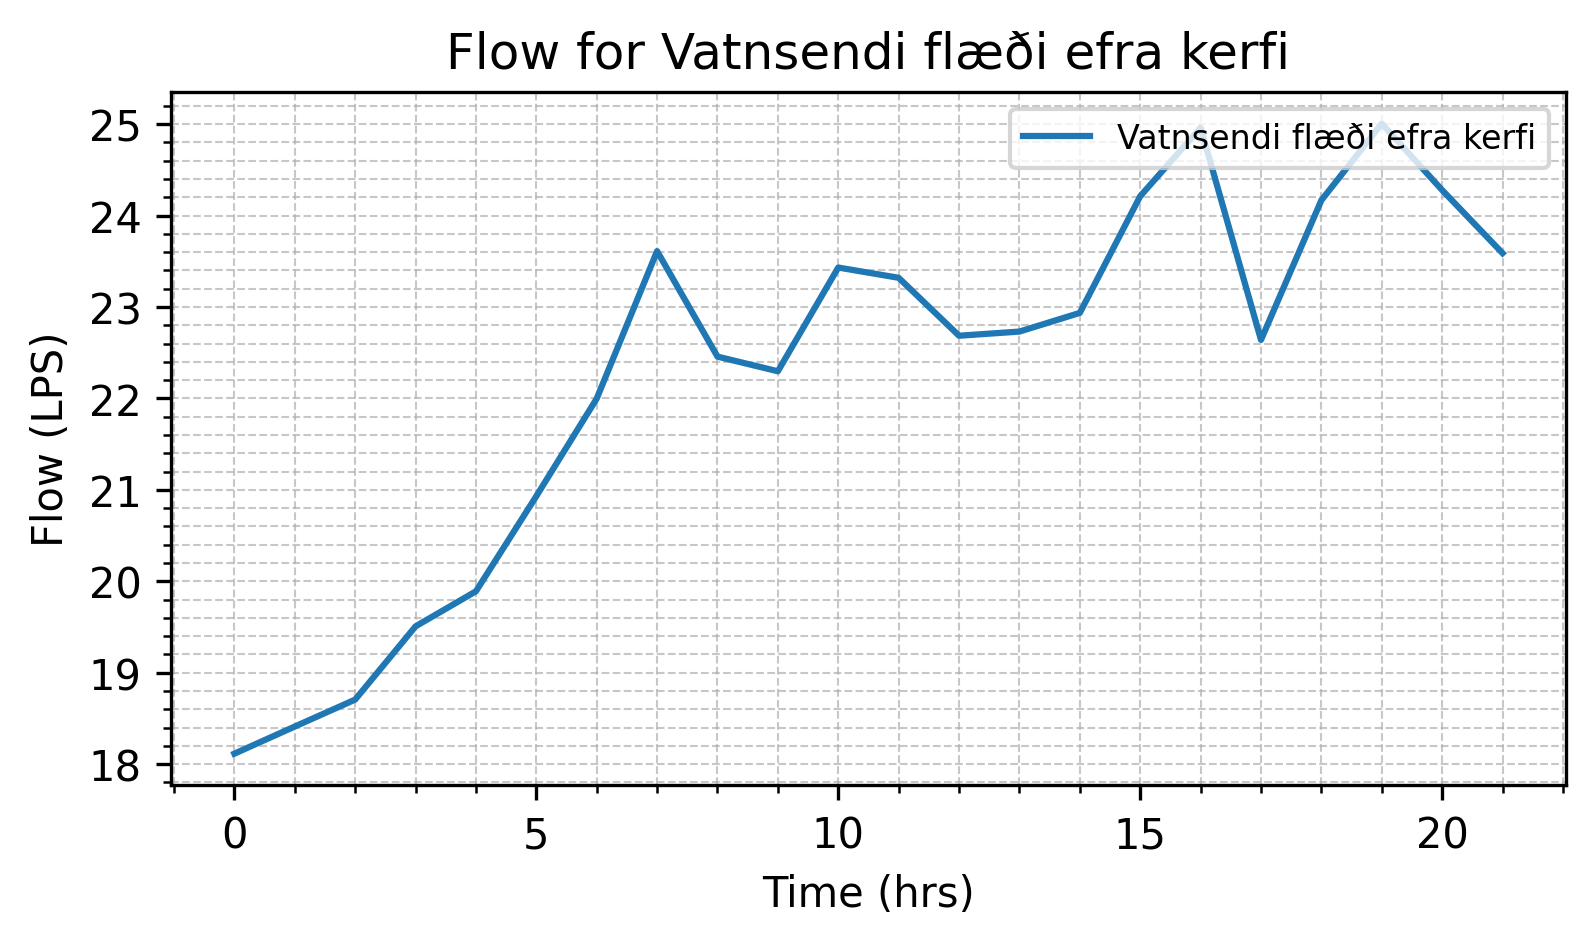

In [297]:
link_input_names = ['11', '19', 'Pipe-62614']
link_indices = get_link_indices(d, link_input_names)

custom_legend_names = ['Rjúpnasalir flæði', 'Vatnsendi flæði neðra kerfi', 'Vatnsendi flæði efra kerfi']

# Loop through each link index and create a separate figure
for i, index in enumerate(link_indices):
    # Create a new figure for each link
    plt.figure(figsize=(6, 3))
    
    # Extract the flow for the link and take the absolute value
    flow = np.abs(hyd_res.Flow[:, index - 1])  # Take absolute value of flow
    
    # Plot the absolute flow over time
    plt.plot(hrs_time, flow, label=custom_legend_names[i])
    
    # Customize the plot
    plt.title(f'Flow for {custom_legend_names[i]}')
    plt.xlabel('Time (hrs)')
    plt.ylabel(f'Flow ({d.units.LinkFlowUnits})')  # Units of link flow

    # Enable minor ticks for finer grid
    plt.minorticks_on()

    # Apply finer grid resolution
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Add a legend
    plt.legend(loc='upper right', fontsize=8)
    
    # Show the plot
    plt.show()


# #     import pandas as pd

# # Get the index for link "11"
# link_name = 'Pipe-62614'
# link_index = get_link_indices(d, [link_name])[0]

# # Extract the absolute flow data for that link
# flow_data = np.abs(hyd_res.Flow[:, link_index - 1])

# # Create a DataFrame with time and flow
# df = pd.DataFrame({
#     'Time (hrs)': hrs_time,
#     f'Flow {link_name} ({d.units.LinkFlowUnits})': flow_data
# })

# # Save the DataFrame to CSV
# df.to_csv(f'flow_{link_name}.csv', index=False)

# print(f"Flow data for link {link_name} saved to flow_{link_name}.csv")



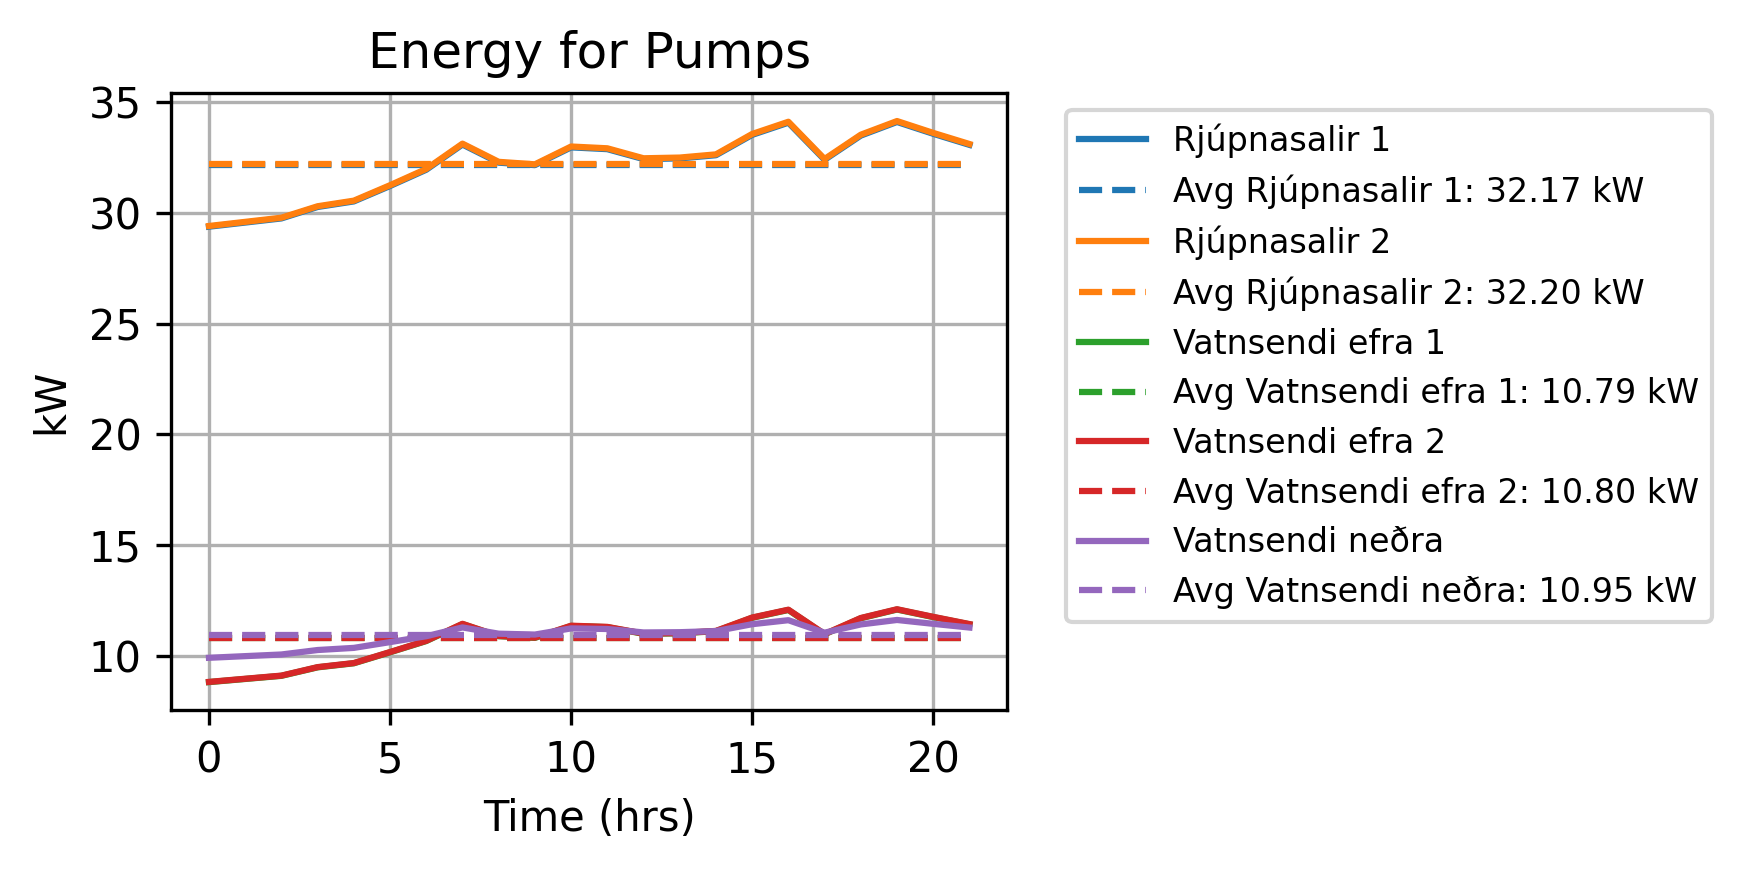

In [298]:
link_input_names = ['17','10','25','26','27']
link_indices = get_link_indices(d,link_input_names)
link_indices

# Define custom legend names for the links
custom_legend_names = {
    '17': 'Rjúpnasalir 1',
    '10': 'Rjúpnasalir 2',
    '25': 'Vatnsendi efra 1',
    '26': 'Vatnsendi efra 2',
    '27': 'Vatnsendi neðra'
}

# Create a figure
plt.figure(figsize=(6, 3))

# Lists to store legend entries
legend_labels = []
legend_lines = []

# Loop through each link index and plot the corresponding absolute energy
for index, link_name in zip(link_indices, link_input_names):
    # Extract the energy for the link
    kw = hyd_res.Energy[:, index - 1]  
    
    # Get the custom name or fall back to default if not in the dictionary
    legend_name = custom_legend_names.get(link_name, f'Link {link_name}')
    
    # Plot the energy over time and store the line object
    line, = plt.plot(hrs_time, kw, label=legend_name)
    
    # Calculate the average
    avg_kw = np.mean(kw)
    
    # Plot the average as a dashed line using the same color
    avg_line, = plt.plot(hrs_time, np.full_like(hrs_time, avg_kw), linestyle='dashed', color=line.get_color())
    
    # Store legend entries
    legend_lines.append(line)
    legend_labels.append(legend_name)
    
    legend_lines.append(avg_line)
    legend_labels.append(f'Avg {legend_name}: {avg_kw:.2f} kW')

# Customize the plot
plt.title('Energy for Pumps')
plt.xlabel('Time (hrs)')
plt.ylabel('kW')  # Units of energy

# Add a grid for better visualization
plt.grid(True)

# Add a custom legend with both lines and averages
plt.legend(legend_lines, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to prevent clipping of legend
plt.tight_layout()

# Show the plot
plt.show()


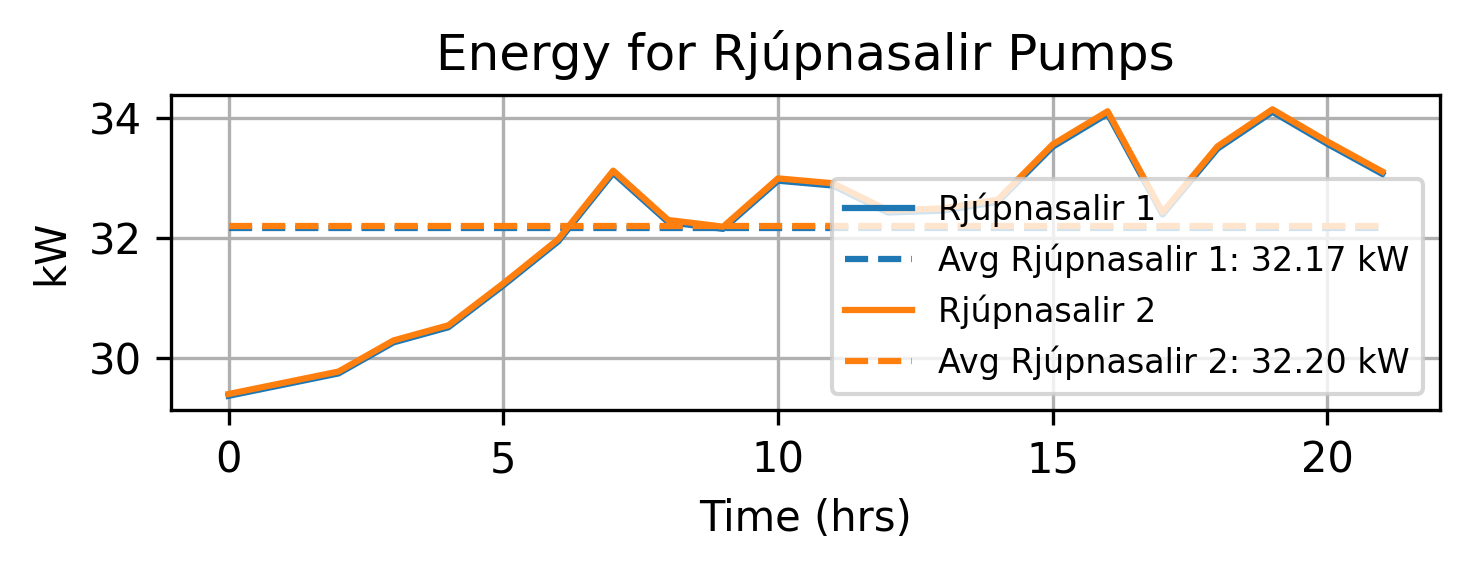

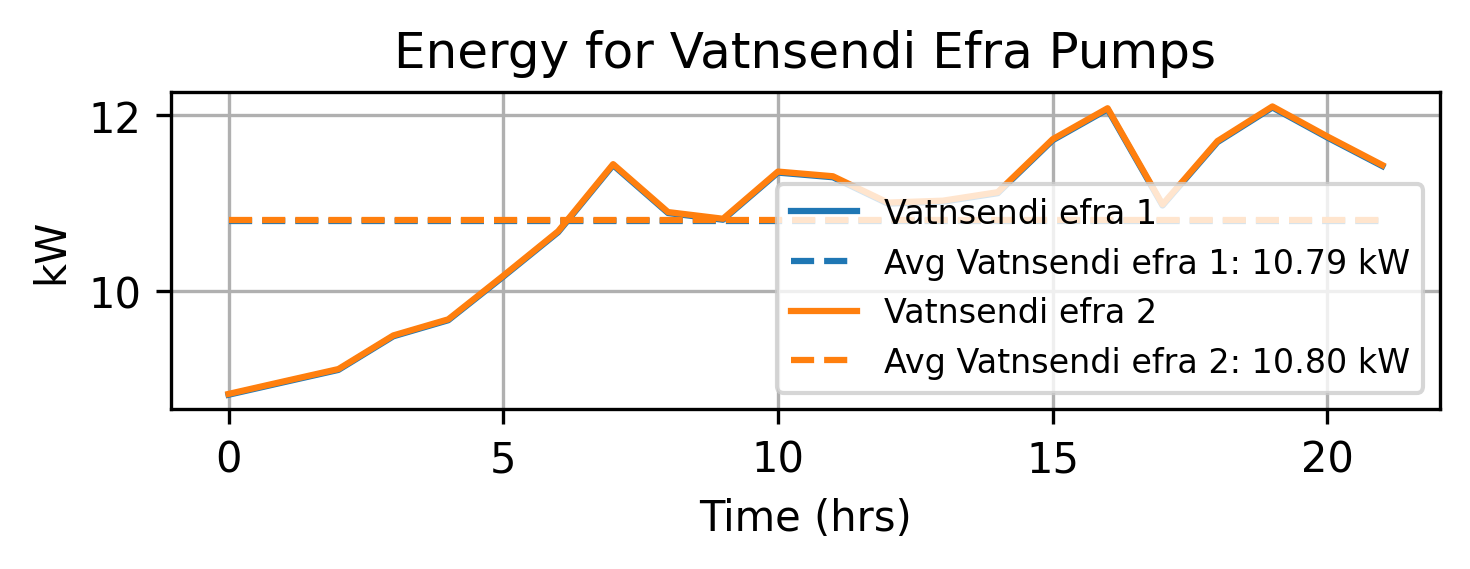

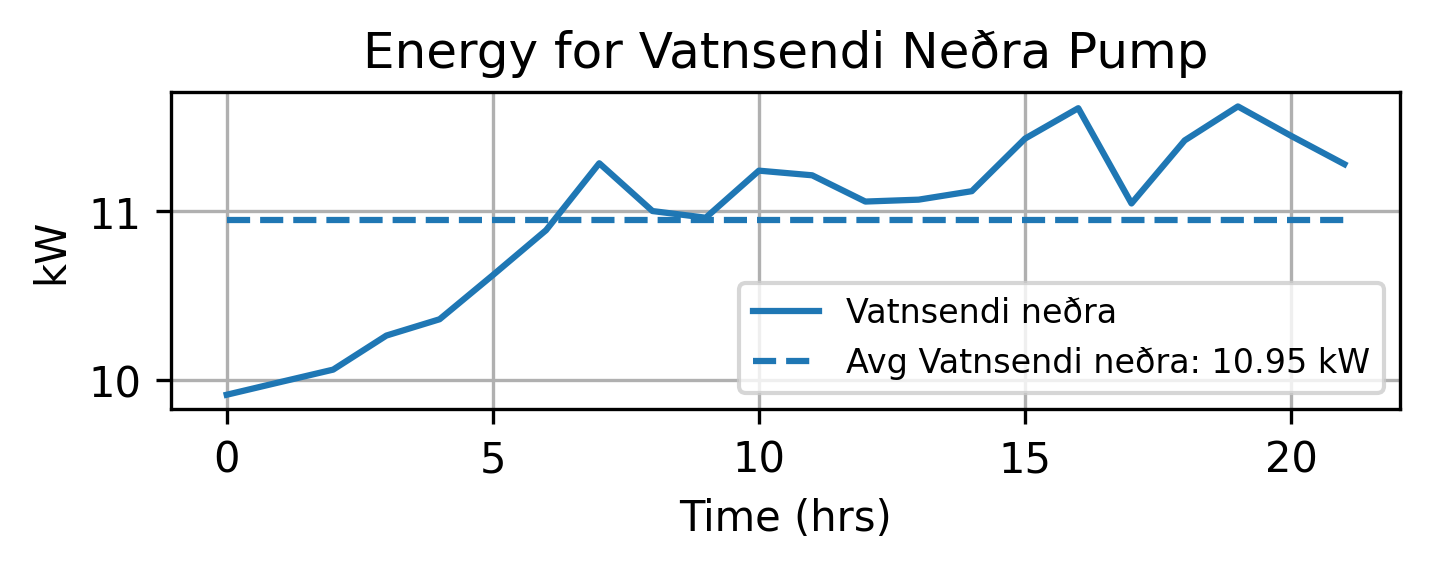

In [ ]:
# Group the links into three separate plots
grouped_links = {
    "Rjúpnasalir Pumps": ['17', '10'],
    "Vatnsendi Efra Pumps": ['25', '26'],
    "Vatnsendi Neðra Pump": ['27']
}

custom_legend_names = {
    '17': 'Rjúpnasalir 1',
    '10': 'Rjúpnasalir 2',
    '25': 'Vatnsendi efra 1',
    '26': 'Vatnsendi efra 2',
    '27': 'Vatnsendi neðra'
}

# Loop through each group and create a separate plot
for title, link_group in grouped_links.items():
    plt.figure(figsize=(5, 2))
    
    legend_lines = []
    legend_labels = []
    
    for link_name in link_group:
        index = link_indices[link_input_names.index(link_name)]  # Get index from input list
        kw = hyd_res.Energy[:, index - 1]  # Extract energy data
        
        legend_name = custom_legend_names.get(link_name, f'Link {link_name}')
        line, = plt.plot(hrs_time, kw, label=legend_name)
        
        # Compute and plot the average
        avg_kw = np.mean(kw)
        avg_line, = plt.plot(hrs_time, np.full_like(hrs_time, avg_kw), linestyle='dashed', color=line.get_color())
        
        # Store legend entries
        legend_lines.append(line)
        legend_labels.append(legend_name)
        
        legend_lines.append(avg_line)
        legend_labels.append(f'Avg {legend_name}: {avg_kw:.2f} kW')

    # Customize the plot
    plt.title(f'Energy for {title}')
    plt.xlabel('Time (hrs)')
    plt.ylabel('kW')
    plt.grid(True)

    # Add legend
    plt.legend(legend_lines, legend_labels, fontsize=8)
    # plt.legend(legend_lines, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# import pandas as pd

# # Extract the indices for Rjúpnasalir pumps
# rju_links = ['25', '26']
# rju_indices = [link_indices[link_input_names.index(link)] for link in rju_links]

# # Create a dictionary for the DataFrame
# rju_data = {'Time (hrs)': hrs_time}

# # Add energy data for each Rjúpnasalir pump
# for link, index in zip(rju_links, rju_indices):
#     kw = hyd_res.Energy[:, index - 1]
#     rju_data[f"{custom_legend_names[link]} (kW)"] = kw

# # Create and save the DataFrame
# df_rju = pd.DataFrame(rju_data)
# df_rju.to_csv("rjupnasalir_pumps_energy.csv", index=False)

# print("Energy data for Rjúpnasalir pumps saved to rjupnasalir_pumps_energy.csv")




# Lets check the IoT sensors

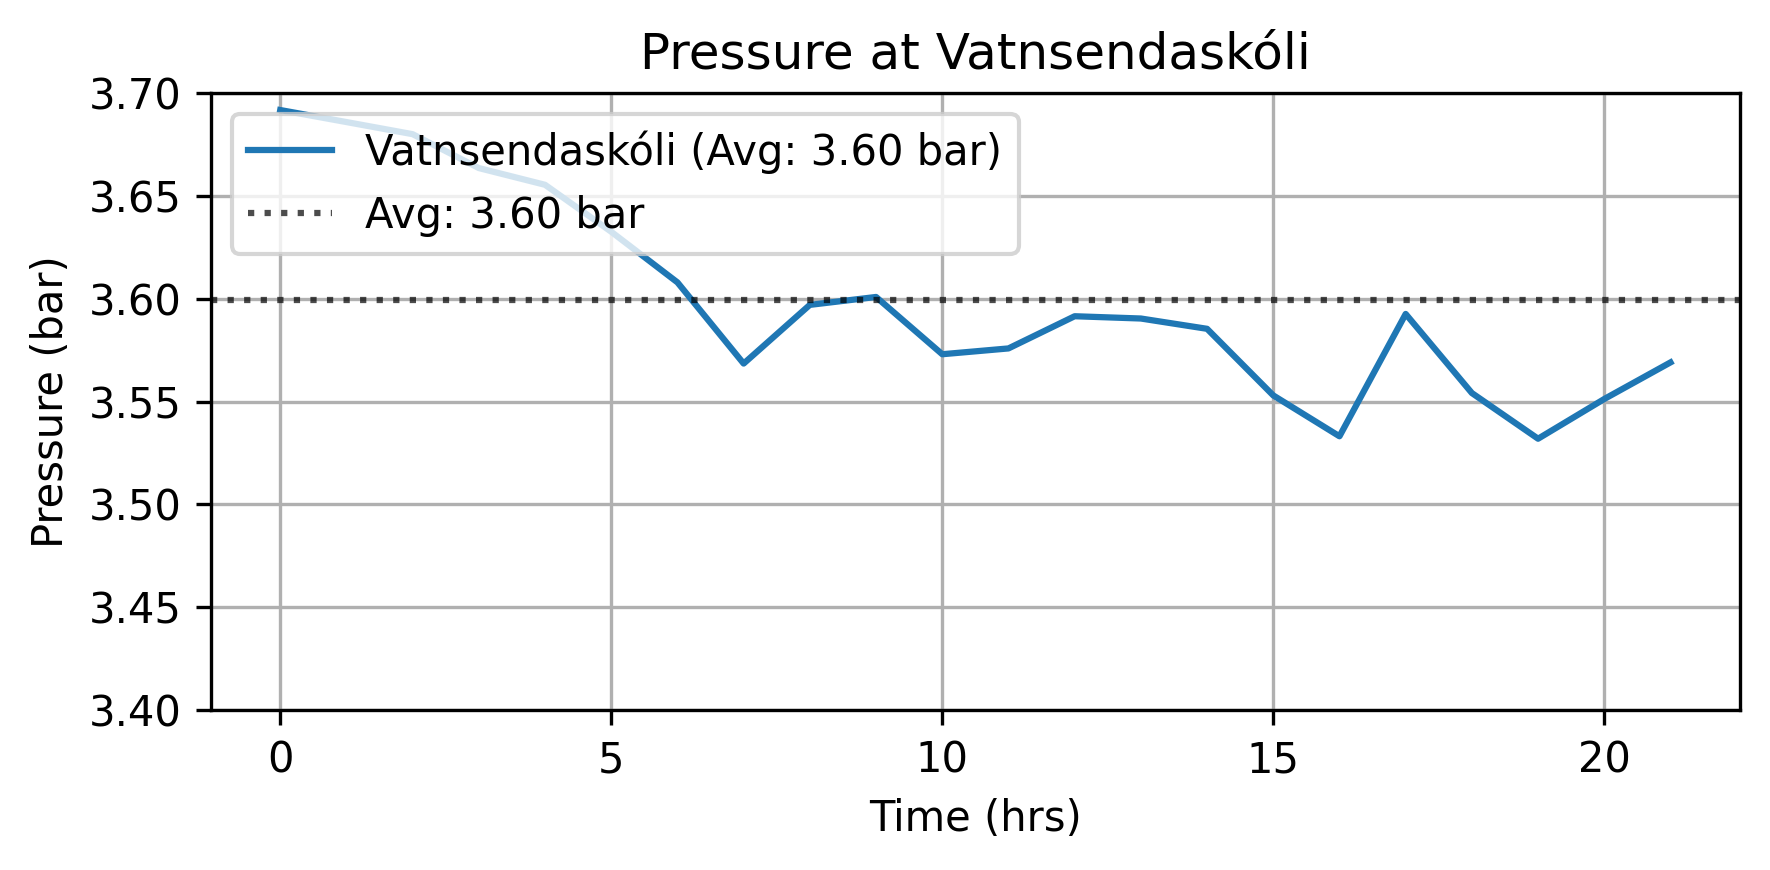

In [300]:
node_input_names = ['Junction-23690']
node_indices = get_node_indices(d, node_input_names)
# Choose a single node index (e.g., the first node in node_indices)
node_index = node_indices[0]  # Change the index to the desired node

# Conversion factor from meters of water to bar
meters_to_bar = 0.0980665  

# Get the pressure data for the selected node and convert it to bar
pressure_in_bar = hyd_res.Pressure[:, node_index - 1] * meters_to_bar

# Compute the average pressure
avg_pressure = np.mean(pressure_in_bar)

# Create a figure
plt.figure(figsize=(6, 3))

# Plot the pressure curve
plt.plot(hrs_time, pressure_in_bar, label=f"Vatnsendaskóli (Avg: {avg_pressure:.2f} bar)")

# Plot the average pressure as a dotted line
plt.axhline(y=avg_pressure, linestyle='dotted', color='black', alpha=0.7, label=f"Avg: {avg_pressure:.2f} bar")

# Customize the plot
plt.title(f"Pressure at Vatnsendaskóli")
plt.xlabel("Time (hrs)")
plt.ylabel("Pressure (bar)")
plt.legend(loc="upper left")
plt.ylim([3.4, 3.7])
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


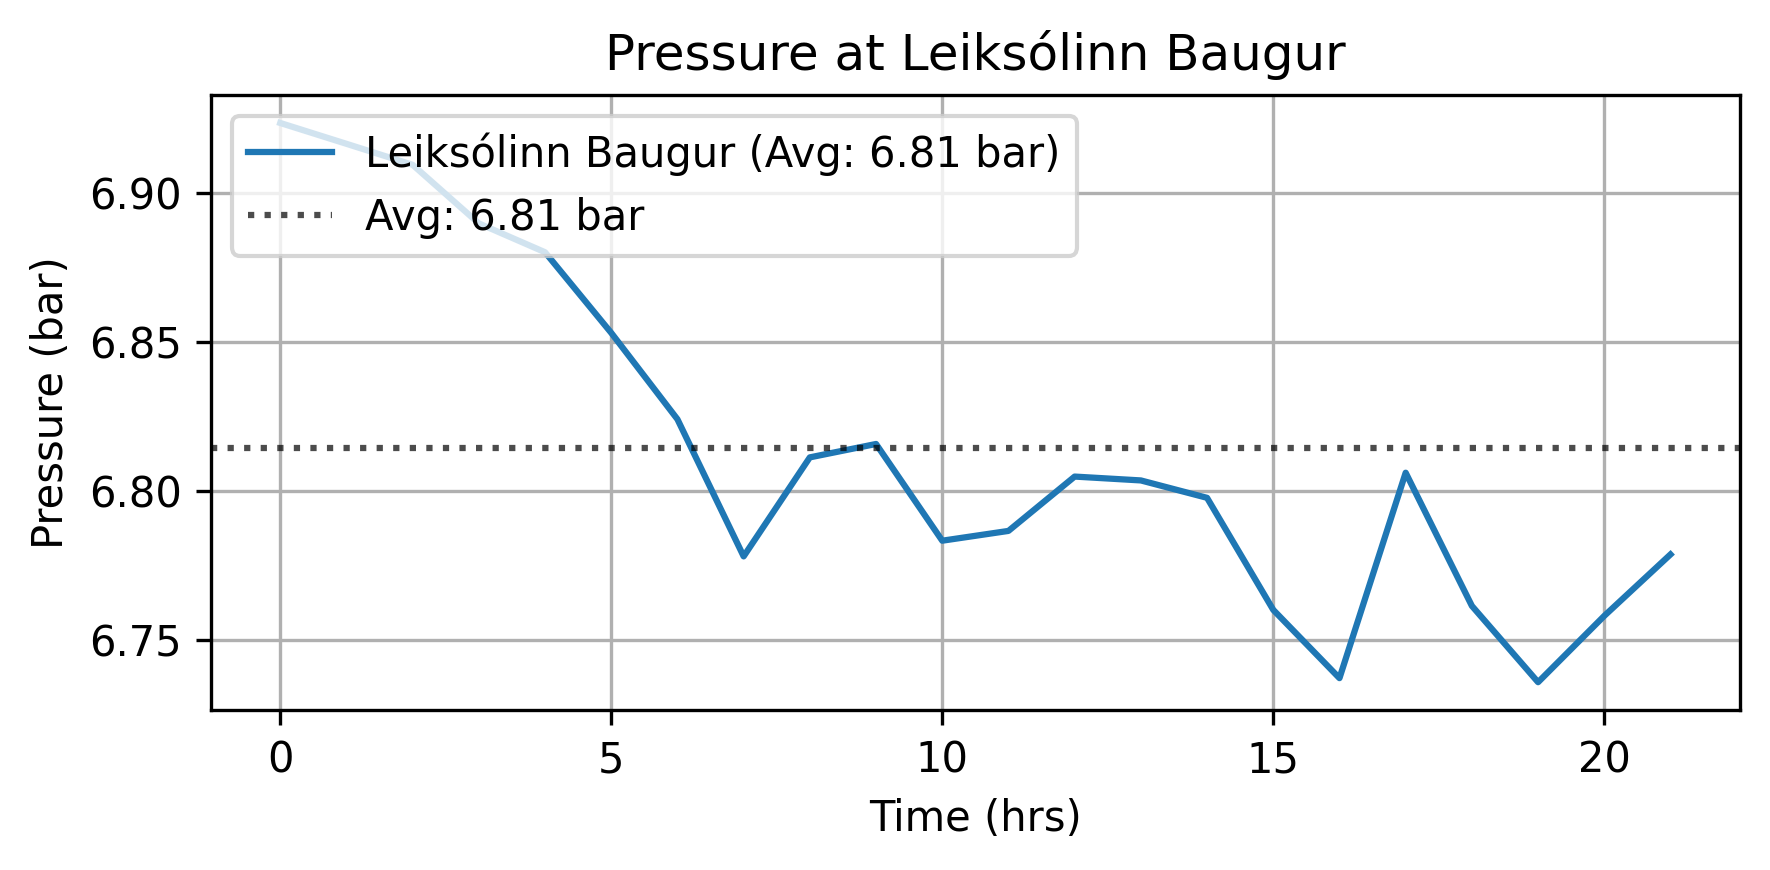

In [301]:
node_input_names = ['Junction-10139']
node_indices = get_node_indices(d, node_input_names)
# Choose a single node index (e.g., the first node in node_indices)
node_index = node_indices[0]  # Change the index to the desired node

# Conversion factor from meters of water to bar
meters_to_bar = 0.0980665  

# Get the pressure data for the selected node and convert it to bar
pressure_in_bar = hyd_res.Pressure[:, node_index - 1] * meters_to_bar

# Compute the average pressure
avg_pressure = np.mean(pressure_in_bar)

# Create a figure
plt.figure(figsize=(6, 3))

# Plot the pressure curve
plt.plot(hrs_time, pressure_in_bar, label=f"Leiksólinn Baugur (Avg: {avg_pressure:.2f} bar)")

# Plot the average pressure as a dotted line
plt.axhline(y=avg_pressure, linestyle='dotted', color='black', alpha=0.7, label=f"Avg: {avg_pressure:.2f} bar")

# Customize the plot
plt.title(f"Pressure at Leiksólinn Baugur")
plt.xlabel("Time (hrs)")
plt.ylabel("Pressure (bar)")
plt.legend(loc="upper left")
# plt.ylim([3.4, 3.7])
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
